<a href="https://colab.research.google.com/github/aysbt/DataScienceProject/blob/master/Classify_traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify the Traffic Sign

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [8]:
#import dataset and normlaize it
with open ("/content/gdrive/My Drive/Colab Notebooks/data/traffic-signs-data/train.p", mode="rb") as training_data:
  train = pickle.load(training_data)
with open ("/content/gdrive/My Drive/Colab Notebooks/data/traffic-signs-data/test.p", mode="rb") as testing_data:
  test = pickle.load(testing_data)
with open ("/content/gdrive/My Drive/Colab Notebooks/data/traffic-signs-data/valid.p", mode="rb") as validation_data:
  valid = pickle.load(validation_data)


In [9]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [10]:
X_train.shape

(34799, 32, 32, 3)

In [11]:
y_train.shape

(34799,)

1

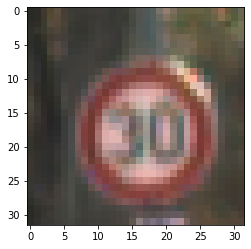

In [14]:
#visulalize dataset
i =3100
plt.imshow(X_train[i])
y_train[i]

26

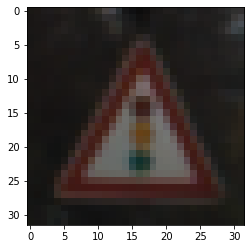

In [13]:
i=200
plt.imshow(X_validation[i])
y_validation[i]

31

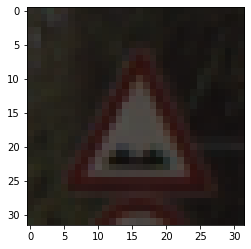

In [15]:
i = 440
plt.imshow(X_test[i])
y_train[i]

In [26]:
# data set preparation
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [27]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

In [28]:
X_train_gray_norm = (X_train_gray -128)/128
X_test_gray_norm = (X_test_gray -128)/128
X_validation_gray_norm = (X_validation_gray -128)/128

In [20]:
X_train_gray_norm

array([[[[ 0.98177083],
         [ 0.984375  ],
         [ 0.98958333],
         ...,
         [ 0.84375   ],
         [ 0.80989583],
         [ 0.86197917]],

        [[ 0.8203125 ],
         [ 0.828125  ],
         [ 0.83854167],
         ...,
         [ 0.7421875 ],
         [ 0.61458333],
         [ 0.45572917]],

        [[ 0.61979167],
         [ 0.6328125 ],
         [ 0.63802083],
         ...,
         [ 0.17447917],
         [ 0.16927083],
         [ 0.28125   ]],

        ...,

        [[-0.11197917],
         [-0.1640625 ],
         [-0.16145833],
         ...,
         [ 0.02604167],
         [ 0.        ],
         [-0.01822917]],

        [[-0.11197917],
         [-0.15885417],
         [-0.18489583],
         ...,
         [ 0.01822917],
         [-0.01041667],
         [-0.03645833]],

        [[-0.1171875 ],
         [-0.16666667],
         [-0.1796875 ],
         ...,
         [-0.01302083],
         [-0.01822917],
         [-0.03385417]]],


       [[[-0.20572917],


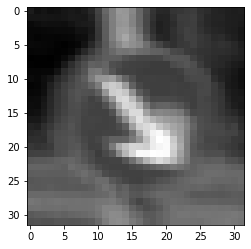

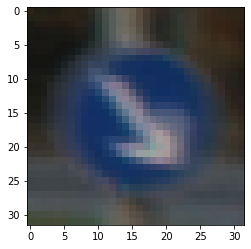

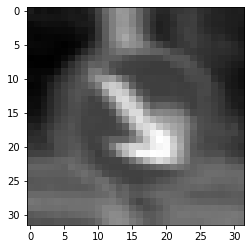

In [21]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [24]:
#model trainig
from tensorflow.keras import datasets, layers, models
LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6,(5,5), activation='relu', input_shape=(32,32,1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16,(5,5), activation='relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [25]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [31]:
history = LeNet.fit(X_train_gray_norm,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 16s 222ms/step - loss: 3.1637 - accuracy: 0.1659 - val_loss: 2.7058 - val_accuracy: 0.3005
Epoch 2/50
70/70 [==============================] - 16s 225ms/step - loss: 1.6461 - accuracy: 0.5340 - val_loss: 1.3947 - val_accuracy: 0.5823
Epoch 3/50
70/70 [==============================] - 16s 224ms/step - loss: 0.9163 - accuracy: 0.7330 - val_loss: 0.9931 - val_accuracy: 0.7014
Epoch 4/50
70/70 [==============================] - 16s 224ms/step - loss: 0.6497 - accuracy: 0.8135 - val_loss: 0.8678 - val_accuracy: 0.7460
Epoch 5/50
70/70 [==============================] - 16s 225ms/step - loss: 0.5004 - accuracy: 0.8609 - val_loss: 0.7766 - val_accuracy: 0.7825
Epoch 6/50
70/70 [==============================] - 16s 227ms/step - loss: 0.4085 - accuracy: 0.8884 - val_loss: 0.7216 - val_accuracy: 0.7939
Epoch 7/50
70/70 [==============================] - 16s 230ms/step - loss: 0.3499 - accuracy: 0.9039 - val_loss: 0.7123 - val_accuracy: 0.8100

In [32]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print(f'Test Accuracy: {score[1]}')

395/395 [==============================] - 4s 10ms/step - loss: 1.4495 - accuracy: 0.8527
Test Accuracy: 0.8527315855026245


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

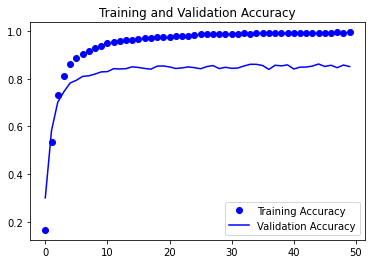

In [36]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy,'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

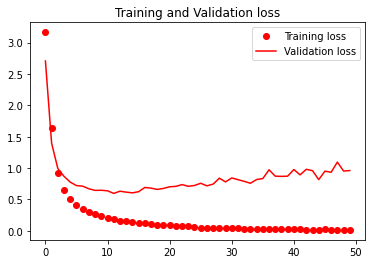

In [37]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [38]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


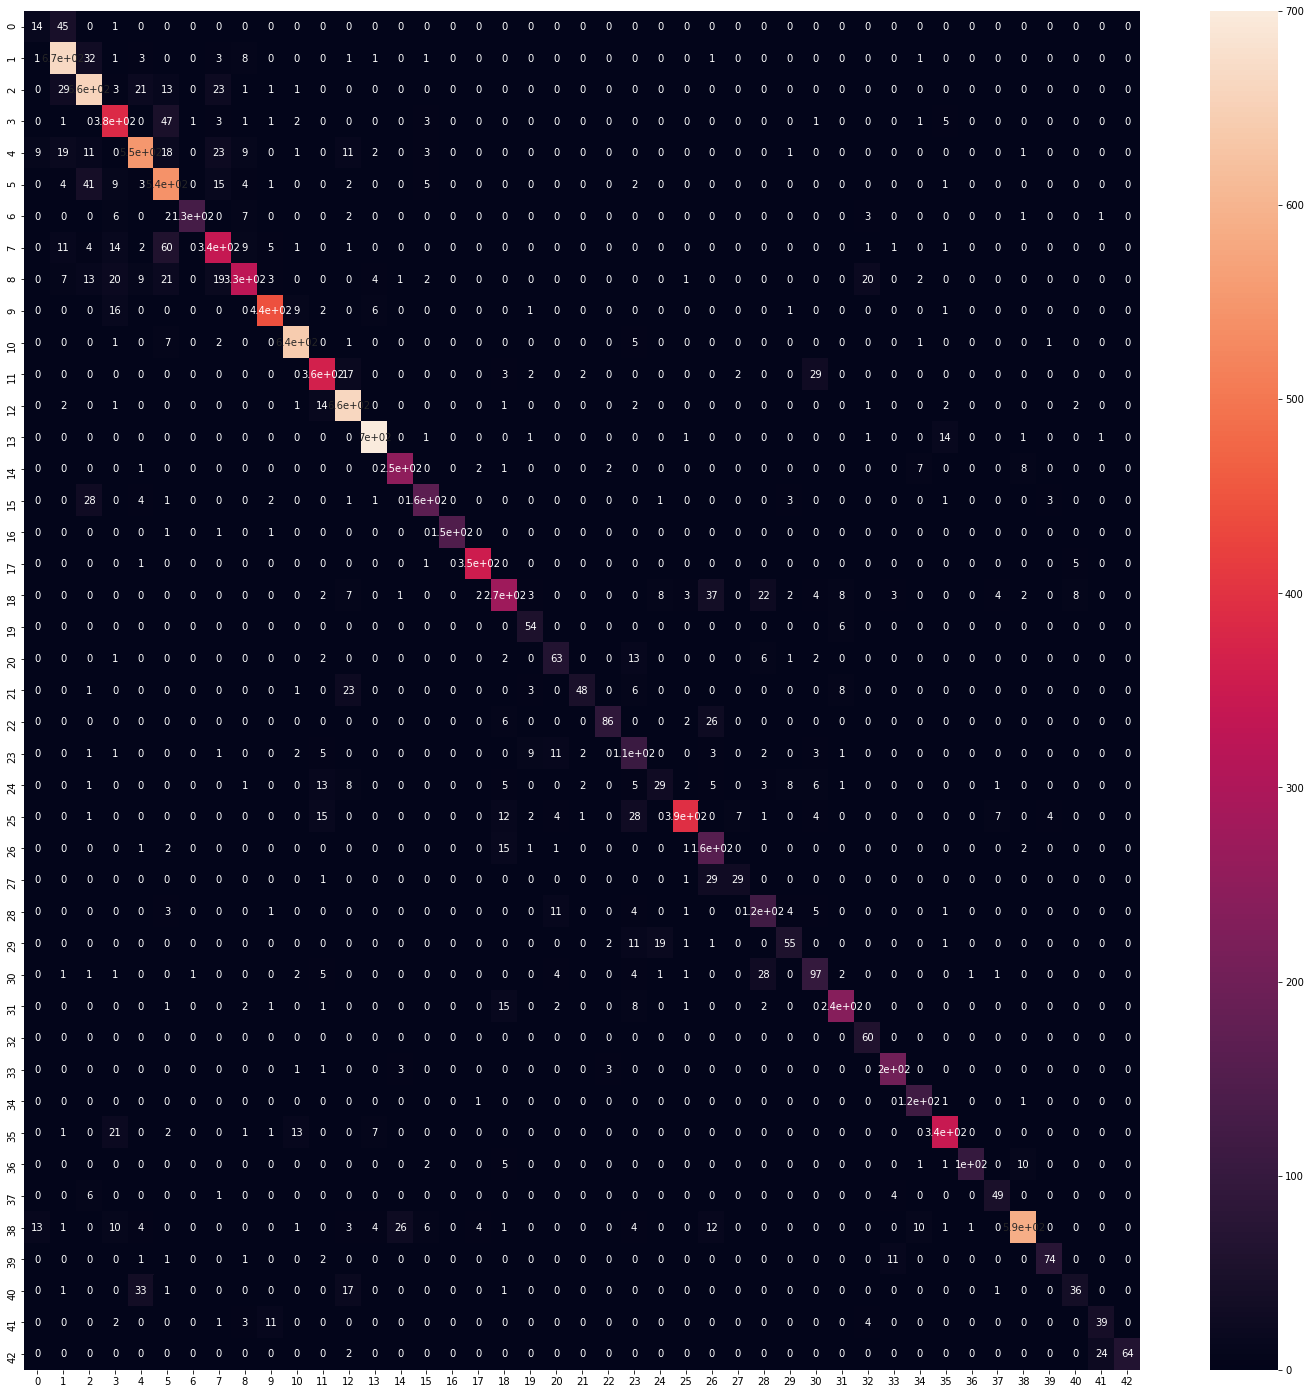

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

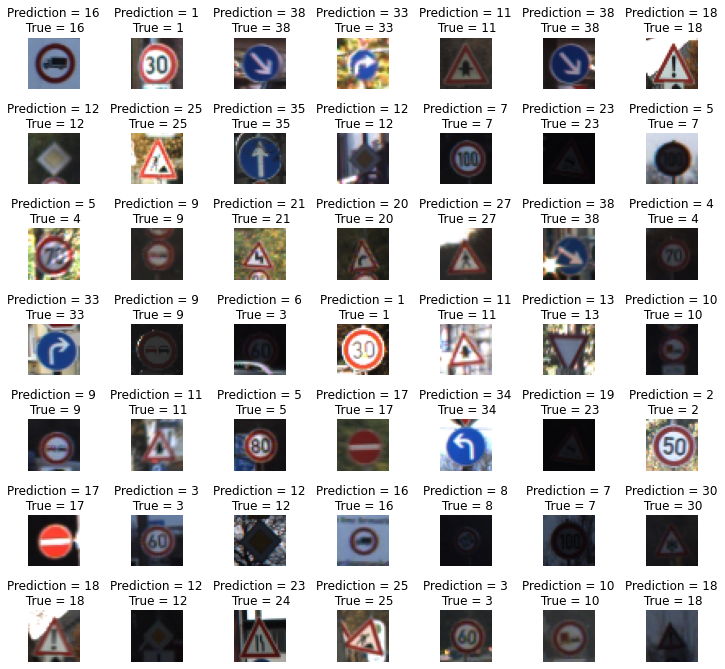

In [40]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 